In [2]:
import pandas as pd
data = pd.read_csv('data/Students_Mental_Health.csv')

data.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


In [3]:
len(data)

7022

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7010 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7007 non-null   object 
 13  Counseling_Service

In [5]:
data.describe()

,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load
count,7022.000000,7010.00000,7022.000000,7022.000000,7022.000000,7022.000000,7022.000000
mean,23.003418,3.49127,2.427941,2.254486,2.300484,2.453005,22.010538
std,3.853978,0.28742,1.638408,1.625193,1.624305,1.708995,4.358380
min,18.000000,2.44000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,20.000000,3.29000,1.000000,1.000000,1.000000,1.000000,18.000000
50%,22.000000,3.50000,2.000000,2.000000,2.000000,2.000000,22.000000
75%,25.000000,3.70000,4.000000,3.000000,4.000000,4.000000,26.000000
max,35.000000,4.00000,5.000000,5.000000,5.000000,5.000000,29.000000


In [6]:
data.dropna(axis=0, inplace=True)

In [7]:
len(data)

6995

In [8]:
data["Depression_Score"].value_counts(normalize=True)

Depression_Score
3    0.197999
1    0.186276
2    0.185847
0    0.184132
4    0.125518
5    0.120229
Name: proportion, dtype: float64

In [9]:
data = data.drop(["Anxiety_Score"], axis=1).reset_index()

In [10]:
# Vamos a user OneHOtEncoder para transformar los valores de la columna 'Gender':
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
enc = OneHotEncoder(sparse_output=False)
gender = enc.fit_transform(data[["Gender"]])


In [11]:
enc.categories_

[array(['Female', 'Male'], dtype=object)]

In [12]:
data = pd.merge(data, pd.DataFrame(gender, columns=["Male", "Female"]), left_index=True, right_index=True)

In [13]:
data.head()

,index,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Sleep_Quality,Physical_Activity,Diet_Quality,...,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type,Male,Female
0,0,25,Others,Male,3.56,3,3,Good,Moderate,Good,...,Never,Never,No,No,2,Moderate,17,On-Campus,0.0,1.0
1,1,24,Engineering,Female,2.44,0,3,Average,Low,Average,...,Occasionally,Occasionally,No,No,3,Low,27,On-Campus,1.0,0.0
2,2,19,Business,Female,3.74,4,0,Good,Low,Average,...,Never,Occasionally,No,No,4,High,15,On-Campus,1.0,0.0
3,4,18,Business,Male,3.40,3,3,Good,Low,Average,...,Never,Never,No,Yes,0,High,23,On-Campus,0.0,1.0
4,5,21,Medical,Female,3.35,2,4,Good,Moderate,Good,...,Never,Never,No,No,5,Moderate,19,Off-Campus,1.0,0.0


In [14]:
data.drop(columns={"Gender", "Male"}, inplace=True)

In [15]:
data = data.rename(columns = {'Female': "Gender"})

In [16]:
data.head()

,index,Age,Course,CGPA,Stress_Level,Depression_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type,Gender
0,0,25,Others,3.56,3,3,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus,1.0
1,1,24,Engineering,2.44,0,3,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus,0.0
2,2,19,Business,3.74,4,0,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus,0.0
3,4,18,Business,3.40,3,3,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus,1.0
4,5,21,Medical,3.35,2,4,Good,Moderate,Good,High,Single,Never,Never,No,No,5,Moderate,19,Off-Campus,0.0


In [17]:
data["Residence_Type"].unique()

array(['On-Campus', 'Off-Campus', 'With Family'], dtype=object)

In [18]:
label_cols = ["Family_History", "Chronic_Illness"]
onehot_cols = ["Course"]
standard_cols = ["Age", "CGPA", "Semester_Credit_Load"]
apply_cols = ["Sleep_Quality", "Physical_Activity", "Diet_Quality", "Social_Support", "Relationship_Status", "Substance_Use", "Counseling_Service_Use", "Extracurricular_Involvement", "Residence_Type"]

In [19]:
def transform_columns():
   new_values = {}
   for col in apply_cols:
      if "Moderate" in data[col].unique():
         new_values = { "Low": 0, "Moderate": 1, "High": 2}
      if "Never" in data[col].unique():
         new_values = { "Never": 0, "Occasionally": 1, "Frequently": 2}
      if "Good" in data[col].unique():
         new_values = { "Good": 0, "Average": 1, "Poor": 2}
      if "Single" in data[col].unique():
         new_values = { "Single": 0, "In a Relationship": 1.5, "Married": 2}
      if "On-Campus" in data[col].unique():
         new_values = { "On-Campus": 0, "Off-Campus": 1, "With Family": 2}
   
      data[col] = data[col].apply(lambda x: new_values[x])
   
   for col in label_cols:
      label = LabelEncoder()
      data[col] = label.fit_transform(data[[col]])

   ohe = OneHotEncoder(sparse_output=False)
   ohe_processed = ohe.fit_transform(data[["Course"]])
   courses = pd.DataFrame(ohe_processed)
   courses.columns = list(ohe.categories_[0])
   return pd.merge(data, courses, left_index=True, right_index=True)
      

   

In [20]:
data.head()

,index,Age,Course,CGPA,Stress_Level,Depression_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type,Gender
0,0,25,Others,3.56,3,3,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus,1.0
1,1,24,Engineering,2.44,0,3,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus,0.0
2,2,19,Business,3.74,4,0,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus,0.0
3,4,18,Business,3.40,3,3,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus,1.0
4,5,21,Medical,3.35,2,4,Good,Moderate,Good,High,Single,Never,Never,No,No,5,Moderate,19,Off-Campus,0.0


In [21]:
data = transform_columns()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
data = data.drop(columns=["Course", "index"], axis=1)

In [23]:
data.head()

,Age,CGPA,Stress_Level,Depression_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,...,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type,Gender,Business,Computer Science,Engineering,Law,Medical,Others
0,25,3.56,3,3,0,1,0,1,2.0,0,...,1,17,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,24,2.44,0,3,1,0,1,0,0.0,1,...,0,27,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,19,3.74,4,0,0,0,1,1,1.5,0,...,2,15,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,18,3.40,3,3,0,0,1,2,2.0,0,...,2,23,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,21,3.35,2,4,0,1,0,2,0.0,0,...,1,19,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import make_pipeline

# ohe_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))


# full_pipeline = ColumnTransformer(
#     transformers=[
#         ("one", ohe_pipeline, onehot_cols),
#         ("label", LabelEncoder(), ['Family_History']),
#     ],
#     remainder='passthrough'
# )

# full_pipeline.fit(data)

In [25]:
# Vamos a probar a hacer el split en train y test de forma aleatoria, con un 20% de valores en test y un 80% en train:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=["Depression_Score"]), data["Depression_Score"], test_size=0.2, random_state=1743)

In [26]:
# Comprobamos si nos ha salido equilibrado:
y_train.value_counts(normalize=True)

Depression_Score
3    0.196569
1    0.191744
2    0.183167
0    0.182988
4    0.123660
5    0.121873
Name: proportion, dtype: float64

In [27]:
y_test.value_counts(normalize=True)

Depression_Score
3    0.203717
2    0.196569
0    0.188706
1    0.164403
4    0.132952
5    0.113653
Name: proportion, dtype: float64

In [28]:
# No nos ha salido muy equilibrado para el valor de 1, asi que vamos a hacer el stratified shuffle split:
from sklearn.model_selection import StratifiedShuffleSplit
X = data.drop(columns=["Depression_Score"])
y = data["Depression_Score"]
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1743)
for train_index, test_index in split.split(X, y):
    train_set = X.iloc[train_index]
    train_y_set = y.iloc[train_index]
    test_set = X.iloc[test_index]
    test_y_set = y.iloc[test_index]

In [29]:
train_y_set.value_counts(normalize=True)

Depression_Score
3    0.197999
1    0.186204
2    0.185847
0    0.184239
4    0.125447
5    0.120264
Name: proportion, dtype: float64

In [30]:
test_y_set.value_counts(normalize=True)

Depression_Score
3    0.197999
1    0.186562
2    0.185847
0    0.183703
4    0.125804
5    0.120086
Name: proportion, dtype: float64

In [31]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
from pathlib import Path
# Creamos el directorio:
IMAGES_PATH = Path() / "images" / "regression_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [32]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2, min_samples_leaf=20, random_state=800)

In [33]:
tree_reg.fit(train_set, train_y_set)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=20, random_state=800)

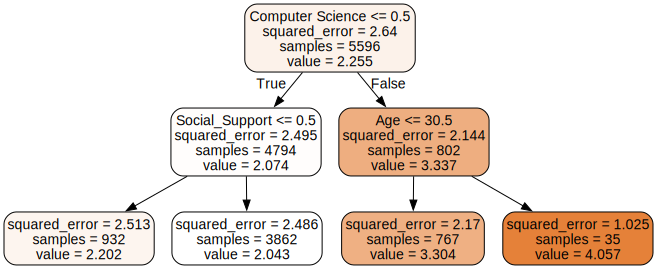

In [36]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=train_set.columns,
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "regression_tree.dot")

In [37]:
tree_reg.feature_names_in_

array(['Age', 'CGPA', 'Stress_Level', 'Sleep_Quality',
       'Physical_Activity', 'Diet_Quality', 'Social_Support',
       'Relationship_Status', 'Substance_Use', 'Counseling_Service_Use',
       'Family_History', 'Chronic_Illness', 'Financial_Stress',
       'Extracurricular_Involvement', 'Semester_Credit_Load',
       'Residence_Type', 'Gender', 'Business', 'Computer Science',
       'Engineering', 'Law', 'Medical', 'Others'], dtype=object)

In [38]:
tree_reg.get_params() # Para obtener todos los hiperparametros del modelo

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 800,
 'splitter': 'best'}

In [39]:
tree_reg.feature_importances_ # Representa para cada columna si la ha usado (le otorga un peso y cuanto mayor sea mas ha ayudado a obtener la prediccion) o no (0). Se puede saber cual es cada valor con los feature_names_in_

array([0.01676522, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01664041, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.96659437, 0.        ,
       0.        , 0.        , 0.        ])

In [40]:
tree_reg.feature_names_in_[tree_reg.feature_importances_ > 0] # Para saber que valores son los que han peso

array(['Age', 'Social_Support', 'Computer Science'], dtype=object)

In [41]:
pd.DataFrame(tree_reg.predict(test_set))[0].unique()

array([2.04324184, 3.30378096, 2.20171674, 4.05714286])

In [42]:
# Calcular el error en el train y en el test:
((tree_reg.predict(test_set) - test_y_set)**2).mean() # Cuanto se equivoca en el test

2.4993230969144276

In [43]:
((tree_reg.predict(train_set) - train_y_set)**2).mean() # Cuanto se equivoca en el train

2.4378056852796206

In [44]:
((train_y_set.mean() - test_y_set)**2).mean() # Cuanto se equivoca si asumo que todos tendran la media de calidad de todos. No se la media de calidad del test ya que es el valor que estoy intentando predecir, usa la media del train.

2.6378770307699613

In [45]:
# Vamos a hacer un buble for para  ver que pasa a medida que le añado profundidad al arbol:
from sklearn.tree import DecisionTreeRegressor
for d in range(1,21):
    tree_reg = DecisionTreeRegressor(max_depth=d, min_samples_leaf=20, random_state=800)
    tree_reg.fit(train_set,train_y_set)
    print("Profundidad",d)
    print("Train:", ((tree_reg.predict(train_set)-train_y_set)**2).mean())
    print("Test:", ((tree_reg.predict(test_set)-test_y_set)**2).mean())
    print("*"*100)

Profundidad 1
Train: 2.444570081481446
Test: 2.483544106772406
****************************************************************************************************
Profundidad 2
Train: 2.4378056852796206
Test: 2.4993230969144276
****************************************************************************************************
Profundidad 3
Train: 2.4280081214740976
Test: 2.5058453647828056
****************************************************************************************************
Profundidad 4
Train: 2.4114567685114
Test: 2.5169208510821095
****************************************************************************************************
Profundidad 5
Train: 2.3864525974654702
Test: 2.524873330033877
****************************************************************************************************
Profundidad 6
Train: 2.3471743601632653
Test: 2.5866806243072067
****************************************************************************************************
Profundida

In [46]:
# El arbol tiende a overfittear, asi que en vez de un modelo con un arbol uso uno con 500 lo mas distintos posibles para poder compensar unos con otros. Las tecnicas que son un conjunto de otros modelos se llaman ensemble.

from sklearn.ensemble import RandomForestRegressor
rnd_frt = RandomForestRegressor(n_estimators=500, max_depth=3, min_samples_leaf=30, max_samples=600, random_state=42, oob_score = True)
# oob_score = True -> Out Of Bag Score: para cada arbol hace una prediccion con los vinos que no ha visto ese arbol

In [47]:
rnd_frt.fit(train_set, train_y_set)

RandomForestRegressor(max_depth=3, max_samples=600, min_samples_leaf=30,
                      n_estimators=500, oob_score=True, random_state=42)

In [48]:
rnd_frt.estimators_ # aqui podemos reconstruir nuestros 500 arboles

[DecisionTreeRegressor(max_depth=3, max_features=1.0, min_samples_leaf=30,
                       random_state=1608637542),
 DecisionTreeRegressor(max_depth=3, max_features=1.0, min_samples_leaf=30,
                       random_state=1273642419),
 DecisionTreeRegressor(max_depth=3, max_features=1.0, min_samples_leaf=30,
                       random_state=1935803228),
 DecisionTreeRegressor(max_depth=3, max_features=1.0, min_samples_leaf=30,
                       random_state=787846414),
 DecisionTreeRegressor(max_depth=3, max_features=1.0, min_samples_leaf=30,
                       random_state=996406378),
 DecisionTreeRegressor(max_depth=3, max_features=1.0, min_samples_leaf=30,
                       random_state=1201263687),
 DecisionTreeRegressor(max_depth=3, max_features=1.0, min_samples_leaf=30,
                       random_state=423734972),
 DecisionTreeRegressor(max_depth=3, max_features=1.0, min_samples_leaf=30,
                       random_state=415968276),
 DecisionTre

In [49]:
rnd_frt.estimators_samples_[0] # Los valores del primer arbol. Como tenemos bootstrap a true es normal que se repitan valores.

array([2523, 3113, 2690, 2953, 3303, 3783, 5011, 4466,  632, 3005, 3668,
       2054,  324, 1937, 5427, 3658, 1009, 2909, 3332, 4898,    8, 5518,
       5069, 3360,  510, 2619, 3679, 3577, 1539, 2411, 1838, 2503, 5314,
        361, 5557, 1360,  754, 4849, 3797, 3136, 4864,  378, 2663, 3409,
       2601, 1461,  582, 2304, 3644,  791, 4508, 4622,  249, 3963, 2861,
       4561, 2388, 1701, 3172, 1749, 1606, 4097, 2342, 1377, 3951, 3029,
       2100, 2998, 3593, 3410, 3399, 4169, 5567, 5337,  968,   14,  288,
       1968, 2664, 4014, 3883,  964, 1893, 4083, 3845, 1934, 4242, 2084,
       1944, 3375, 4887, 3924, 4848, 2912, 2959,  512, 3542, 2183, 2682,
       3509, 2829, 5385, 2063, 2941, 1948,  937, 1798, 1072,  476, 3007,
       4992, 1428, 1709, 5169, 2179, 5388, 1505, 1109, 3256, 3171, 1399,
       2449, 2561, 3674, 3828, 1763, 4004, 5286,  763,  598, 1942, 4672,
       2771, 3897, 1623, 4829, 2512,  577, 5433, 3783, 4683, 1029, 3038,
       5478,  669, 5146, 2433, 5040,  995, 1775, 25

In [50]:
pd.DataFrame(rnd_frt.estimators_samples_[0]).value_counts()

0   
5189    2
4864    2
4523    2
4508    2
4327    2
       ..
5557    1
5565    1
5567    1
5580    1
134     1
Name: count, Length: 568, dtype: int64

In [51]:
rnd_frt.oob_score_ # MSE de los datos que estan en el train pero que no han entrado en cada arbol. Va sacando el MSE para cada arbol con los datos con los que ha entrenado (train) frente a los valores que no han entrado en ese arbol, y despues hace una media de todos los MSE que ha calculado. MSE de tu bosque teniendo en cuenta cada arbol.
# Si el oob sale muy parecido al mse del train podria ser señal de underfitting, y si es muy distinto podria ser overfitting. Deberia ser distinto y mas alto el oob porque en el oob hay valores que no ha visto el arbol, y el train son todo valores que ha visto.

0.0731696483200669

In [52]:
((train_y_set - rnd_frt.predict(train_set))**2).mean() # Como nos ha salido mayor que el oob probablemente haya underfitting, hay que aumentar la complejidad del modelo.

2.4273991890393627

In [53]:
((test_y_set - rnd_frt.predict(test_set))**2).mean()

2.4868786476932687

In [88]:
from sklearn.ensemble import RandomForestRegressor
rnd_frt_2 = RandomForestRegressor(n_estimators=5000, max_depth=6, min_samples_leaf=30, max_samples=1279, random_state=42, oob_score = True)

In [89]:
rnd_frt_2.fit(train_set, train_y_set)

RandomForestRegressor(max_depth=6, max_samples=1279, min_samples_leaf=30,
                      n_estimators=5000, oob_score=True, random_state=42)

In [56]:
rnd_frt_2.oob_score_

0.07226591967068985

In [57]:
((train_y_set - rnd_frt_2.predict(train_set))**2).mean()

2.377909136644753

In [58]:
((test_y_set - rnd_frt_2.predict(test_set))**2).mean() # Entre el oob y el test no deberia haber mucha diferencia porque ambos estan prediciendo sobre valores qu eno ha visto el modelo

2.490545601046271

In [59]:
rnd_frt_2.feature_importances_

array([0.05300607, 0.10889693, 0.03549539, 0.01652848, 0.01487787,
       0.0151292 , 0.01931005, 0.01797204, 0.00595582, 0.01588369,
       0.00857716, 0.00145212, 0.04302764, 0.01634083, 0.05928903,
       0.0175689 , 0.01538182, 0.00358905, 0.5101699 , 0.00391754,
       0.00604927, 0.00817466, 0.00340654])

In [60]:
rnd_frt_2.feature_names_in_

array(['Age', 'CGPA', 'Stress_Level', 'Sleep_Quality',
       'Physical_Activity', 'Diet_Quality', 'Social_Support',
       'Relationship_Status', 'Substance_Use', 'Counseling_Service_Use',
       'Family_History', 'Chronic_Illness', 'Financial_Stress',
       'Extracurricular_Involvement', 'Semester_Credit_Load',
       'Residence_Type', 'Gender', 'Business', 'Computer Science',
       'Engineering', 'Law', 'Medical', 'Others'], dtype=object)

In [61]:
importances = pd.DataFrame(rnd_frt_2.feature_importances_).T
importances.columns = train_set.columns

importances

,Age,CGPA,Stress_Level,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,...,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type,Gender,Business,Computer Science,Engineering,Law,Medical,Others
0,0.053006,0.108897,0.035495,0.016528,0.014878,0.015129,0.01931,0.017972,0.005956,0.015884,...,0.016341,0.059289,0.017569,0.015382,0.003589,0.51017,0.003918,0.006049,0.008175,0.003407


In [67]:
from sklearn.ensemble import RandomForestRegressor
rnd_frt_3 = RandomForestRegressor(n_estimators=5000, max_depth=10, min_samples_leaf=30, max_samples=3000, random_state=42, oob_score = True)

In [68]:
rnd_frt_3.fit(train_set, train_y_set)

RandomForestRegressor(max_depth=10, max_samples=3000, min_samples_leaf=30,
                      n_estimators=5000, oob_score=True, random_state=42)

In [69]:
rnd_frt_3.oob_score_

0.0690673288885798

In [70]:
((train_y_set - rnd_frt_3.predict(train_set))**2).mean()

2.2711025253315973

In [71]:
((test_y_set - rnd_frt_3.predict(test_set))**2).mean()

2.4971484592306004

In [62]:
data.corr() # La correlacion es un elemento lineal, los arboles no buscan relaciones lineales, cada corte que hace corta la correlacion lineal porque cada hoja pasa a ser independiente del otro. Aunque la correlacion sea alta no tiene por que tener peso en el arbol.

,Age,CGPA,Stress_Level,Depression_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,...,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type,Gender,Business,Computer Science,Engineering,Law,Medical,Others
Age,1.000000,0.015173,-0.019584,0.001292,-0.004840,0.000606,-0.015511,-0.018736,-0.003395,0.000182,...,0.005231,0.006800,-0.017280,0.026426,-0.014142,-0.007941,0.000225,0.015094,-0.000283,0.003729
CGPA,0.015173,1.000000,0.005239,-0.022324,0.010047,0.009008,-0.000254,0.001122,0.020869,0.012890,...,0.008557,-0.004126,0.000815,-0.020721,-0.001199,0.005729,-0.015469,0.004175,0.003942,0.001431
Stress_Level,-0.019584,0.005239,1.000000,-0.043623,-0.005709,0.006237,0.003604,-0.004364,0.000520,0.000929,...,0.004438,-0.005683,0.015855,0.003396,-0.066242,-0.094557,-0.085935,-0.092049,0.314337,-0.075955
Depression_Score,0.001292,-0.022324,-0.043623,1.000000,0.006750,0.011259,-0.009685,-0.025077,0.007811,0.005437,...,-0.009329,0.023133,0.001107,-0.002873,-0.030921,0.266599,-0.044119,-0.047172,-0.084869,-0.037260
Sleep_Quality,-0.004840,0.010047,-0.005709,0.006750,1.000000,-0.021034,0.013548,-0.025590,0.005789,-0.015540,...,-0.000658,0.008775,0.011845,0.001237,-0.022178,0.006927,0.017314,0.018051,-0.014488,-0.008264
Physical_Activity,0.000606,0.009008,0.006237,0.011259,-0.021034,1.000000,0.000798,-0.007569,-0.000025,-0.007930,...,-0.001280,-0.003820,0.003257,0.013382,-0.015172,0.014087,0.001549,-0.011678,0.015057,-0.010523
Diet_Quality,-0.015511,-0.000254,0.003604,-0.009685,0.013548,0.000798,1.000000,0.002215,0.006547,0.003187,...,0.004945,0.008702,0.024878,-0.009094,-0.009320,0.023491,-0.021313,0.010990,-0.006582,0.002740
Social_Support,-0.018736,0.001122,-0.004364,-0.025077,-0.025590,-0.007569,0.002215,1.000000,0.008399,0.000228,...,0.020281,-0.004330,-0.008061,0.002297,-0.014757,-0.036152,-0.020846,0.023344,0.013638,0.030371
Relationship_Status,-0.003395,0.020869,0.000520,0.007811,0.005789,-0.000025,0.006547,0.008399,1.000000,0.023002,...,0.003874,0.008546,0.000871,-0.006385,0.004591,0.014713,-0.000010,-0.004060,0.002390,-0.020025
Substance_Use,0.000182,0.012890,0.000929,0.005437,-0.015540,-0.007930,0.003187,0.000228,0.023002,1.000000,...,0.020226,-0.001818,-0.010049,-0.002029,0.008111,0.004640,-0.007880,0.003955,-0.001148,-0.007633


In [63]:
# En el random forest como todos los arboles estan buscando el corte que consiga minimizar el mse, todos van a cortar en el alcohol porque es el que mas peso va a tener. Para evitar esto y conseguir mas variedad, preferimos buenos y diferentes que mejores y muy parecidos, podemos:

# Que de todas las columnas tenga en cuenta solo una parte de los datos y elija el mejor:
from sklearn.ensemble import ExtraTreesRegressor
ext_frt = ExtraTreesRegressor(n_estimators=5000, max_depth=6, min_samples_leaf=30, max_samples=1279, random_state=42, oob_score = True, bootstrap=True) # Bootstrap tiene que ser true porque no tienes suficientes valores como para tener 1279 distintos en cada arbol
ext_frt.fit(train_set, train_y_set)

ExtraTreesRegressor(bootstrap=True, max_depth=6, max_samples=1279,
                    min_samples_leaf=30, n_estimators=5000, oob_score=True,
                    random_state=42)

In [73]:
ext_frt.oob_score_

0.07234552023037655

In [74]:
((train_y_set - ext_frt.predict(train_set))**2).mean()

2.39764177517883

In [75]:
((test_y_set - ext_frt.predict(test_set))**2).mean()

2.490794060067135

In [76]:
from sklearn.ensemble import ExtraTreesRegressor
# Que del numero de columnas que yo elija tenga en cuenta solo una parte de los datos y elija el mejor:
ext_frt_2 = ExtraTreesRegressor(n_estimators=5000, max_depth=6, min_samples_leaf=30, max_features=6, random_state=42, oob_score = True, bootstrap=True)
ext_frt_2.fit(train_set, train_y_set)

ExtraTreesRegressor(bootstrap=True, max_depth=6, max_features=6,
                    min_samples_leaf=30, n_estimators=5000, oob_score=True,
                    random_state=42)

In [77]:
importances = pd.DataFrame(ext_frt_2.feature_importances_).T
importances.columns = train_set.columns

importances

,Age,CGPA,Stress_Level,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,...,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type,Gender,Business,Computer Science,Engineering,Law,Medical,Others
0,0.009137,0.011659,0.018283,0.011907,0.014083,0.013627,0.018347,0.014671,0.005383,0.012301,...,0.015481,0.015212,0.013082,0.015008,0.01793,0.623434,0.02569,0.027137,0.058371,0.024448


In [78]:
ext_frt_2.oob_score_

0.07163306757102816

In [79]:
((train_y_set - ext_frt_2.predict(train_set))**2).mean()

2.3955645810100923

In [80]:
((test_y_set - ext_frt_2.predict(test_set))**2).mean()

2.485299589850323

In [81]:
# Adaboost:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6, min_samples_leaf=30, max_features=6), n_estimators=5000, random_state=42, learning_rate=0.05)
ada.fit(train_set, train_y_set) # 500 arboles decision tree que he especificado, aprendiendo unos de otros

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6, max_features=6,
                                                  min_samples_leaf=30),
                  learning_rate=0.05, n_estimators=5000, random_state=42)

In [82]:
((train_y_set - ada.predict(train_set))**2).mean()

2.3735217958590926

In [83]:
((test_y_set - ada.predict(test_set))**2).mean()

2.4973425658438146

In [84]:
# Sale overfitteado el caso anterior, vamos a reducir el max_depth porque este modelo perjudica tener mucha profundidad. A mayor profundidad mas perjudica cuando te equivocas, porque se ha especializado mucho el modelo:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2, min_samples_leaf=30), n_estimators=5000, random_state=42, learning_rate=0.05)
ada.fit(train_set, train_y_set) # 500 arboles decision tree que he especificado, aprendiendo unos de otros

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=2,
                                                  min_samples_leaf=30),
                  learning_rate=0.05, n_estimators=5000, random_state=42)

In [85]:
((train_y_set - ada.predict(train_set))**2).mean()

2.43712990083121

In [86]:
((test_y_set - ada.predict(test_set))**2).mean()

2.484415796323204

In [87]:
importances = pd.DataFrame(ada.feature_importances_).T
importances.columns = train_set.columns

importances

,Age,CGPA,Stress_Level,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,...,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type,Gender,Business,Computer Science,Engineering,Law,Medical,Others
0,0.011443,0.019315,0.009676,0.0,0.001561,0.00945,0.007486,0.0,0.0,0.000363,...,0.000278,0.013482,0.0,0.0,0.0,0.908517,0.0,0.000407,0.000834,0.0
